In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.pyplot import specgram
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes
import xgboost as xgb
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegressionCV
sns.set_context('talk')

/home/kmussar/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [25]:
with open('y_correct.pickle', 'rb') as read_file:
    y = pickle.load(read_file)    

In [26]:
with open('X_top4_features.pickle', 'rb') as read_file:
    X = pickle.load(read_file) 

In [27]:
with open('X3_trainRes.pickle', 'rb') as read_file:
    X_train = pickle.load(read_file) 

In [28]:
with open('y3_trainRes.pickle', 'rb') as read_file:
    y_train = pickle.load(read_file) 

In [29]:
with open('y3_valRes.pickle', 'rb') as read_file:
    y_val = pickle.load(read_file) 

In [30]:
with open('X3_valRes.pickle', 'rb') as read_file:
    X_val = pickle.load(read_file) 

In [41]:
pipe_lr_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_knn_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors=5))])

pipe_rf_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100))])

pipe_svm_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel="linear"))])

pipe_nb_ss = Pipeline([('scl', StandardScaler()),('clf',naive_bayes.GaussianNB())])

pipelines = [pipe_lr_ss, pipe_knn_ss, pipe_rf_ss, pipe_nb_ss, pipe_svm_ss]

for p in pipelines:
    p.fit(X_train, y_train)
    predictions = p.predict(X_val)
    print(classification_report(y_val,predictions))
    print(confusion_matrix(y_val,predictions))

/home/kmussar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67      5072
         1.0       0.67      0.67      0.67      5072

   micro avg       0.67      0.67      0.67     10144
   macro avg       0.67      0.67      0.67     10144
weighted avg       0.67      0.67      0.67     10144

[[3430 1642]
 [1690 3382]]
              precision    recall  f1-score   support

         0.0       0.54      0.88      0.67      5072
         1.0       0.67      0.24      0.35      5072

   micro avg       0.56      0.56      0.56     10144
   macro avg       0.60      0.56      0.51     10144
weighted avg       0.60      0.56      0.51     10144

[[4480  592]
 [3869 1203]]
              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67      5072
         1.0       0.67      0.70      0.69      5072

   micro avg       0.68      0.68      0.68     10144
   macro avg       0.68      0.68      0.68     10144
weighted avg       0

In [ ]:
# Graph ROC Curve for all features and first 4 features 

from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_val, pipe_lr_ss.predict_proba(X_val)[:,1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_val, pipe_knn_ss.predict_proba(X_val)[:,1])
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_val, pipe_rf_ss.predict_proba(X_val)[:,1])
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_val, pipe_nb_ss.predict_proba(X_val)[:,1])
#fpr5, tpr5, thresholds5 = metrics.roc_curve(y_val, pipe_svm_ss.predict_proba(X_val)[:,1])

# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_val,pipe_lr_ss.predict(X_val))
auc2 = metrics.roc_auc_score(y_val,pipe_knn_ss.predict(X_val))
auc3 = metrics.roc_auc_score(y_val,pipe_rf_ss.predict(X_val))
auc4 = metrics.roc_auc_score(y_val,pipe_nb_ss.predict(X_val))
#auc5 = metrics.roc_auc_score(y3_val,pipe_svm_ss.predict(X_val))


 

    

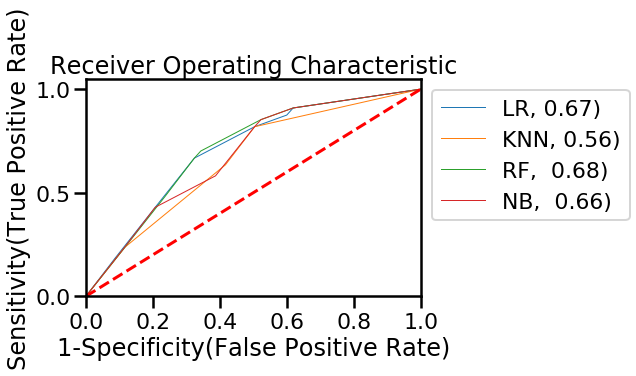

In [55]:
# Now, plot the computed values
plt.plot(fpr1, tpr1, label='LR, %0.2f)' % (auc1),linewidth=1) 
plt.plot(fpr2, tpr2, label='KNN, %0.2f)' % (auc2),linewidth=1) 
plt.plot(fpr3, tpr3, label='RF,  %0.2f)' % (auc3),linewidth=1) 
plt.plot(fpr4, tpr4, label='NB,  %0.2f)' % (auc4),linewidth=1) 
#plt.plot(fpr5, tpr5, label='SVM,  %0.2f)' % (auc5),linewidth=1)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best",bbox_to_anchor=(1,1))
bbox_inches = "tight"
plt.savefig('ROC.jpeg',dpi=600,transparent=True)
plt.show()

In [70]:
.8*584*46

21491.2

In [10]:
test_X = pd.read_csv('test_data.csv')
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
injury and poisoning    15 non-null int64
infectious              15 non-null int64
external injury         15 non-null int64
genitourinary           15 non-null int64
dtypes: int64(4)
memory usage: 560.0 bytes


In [11]:
test_X3 = pd.read_csv('test_data3.csv')
test_X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
injury and poisoning    8 non-null int64
infectious              8 non-null int64
external injury         8 non-null int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [14]:
# CV 

pipe_lr_cv = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegressionCV(cv=5, random_state=100))])

pipe_lr_cv.fit(X_train, y_train)
predictions_cv = pipe_lr_cv.predict(X_val)
print(classification_report(y_val,predictions_cv))
print(confusion_matrix(y_val,predictions_cv))

              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67      5072
         1.0       0.67      0.67      0.67      5072

   micro avg       0.67      0.67      0.67     10144
   macro avg       0.67      0.67      0.67     10144
weighted avg       0.67      0.67      0.67     10144

[[3430 1642]
 [1690 3382]]


In [15]:
predictions2 = pipe_lr.predict(test_X3)
proba = pipe_lr.predict_proba(test_X3)

NameError: name 'pipe_lr' is not defined

In [23]:
predictions2 = pd.DataFrame(predictions2)
predictions2

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0


In [24]:
probabilities = pd.DataFrame(proba)
probabilities

,0,1
0,0.345302,0.654698
1,0.256287,0.743713
2,0.502318,0.497682
3,0.397395,0.602605
4,0.724071,0.275929
5,0.631613,0.368387
6,0.833934,0.166066
7,0.766413,0.233587


In [25]:
results2 = test_X3.copy()
results2['results'] = predictions2
results2['probabilites_0'] = probabilities[0]
results2['probabilites_1'] = probabilities[1]
results2

,injury and poisoning,infectious,external injury,results,probabilites_0,probabilites_1
0,1,1,1,1.0,0.345302,0.654698
1,1,1,0,1.0,0.256287,0.743713
2,1,0,1,0.0,0.502318,0.497682
3,1,0,0,1.0,0.397395,0.602605
4,0,1,1,0.0,0.724071,0.275929
5,0,1,0,0.0,0.631613,0.368387
6,0,0,1,0.0,0.833934,0.166066
7,0,0,0,0.0,0.766413,0.233587


# TEST DATA

In [16]:
with open('y_test.pickle', 'rb') as read_file:
    y_test = pickle.load(read_file)

In [19]:
y_test.value_counts()

0.0    6350
1.0    1287
Name: CLABSI, dtype: int64

In [60]:
with open('X_test.pickle', 'rb') as read_file:
    X_test = pickle.load(read_file)

In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7637 entries, 7534 to 2179
Data columns (total 36 columns):
prior_ICU_hours                                 7637 non-null float64
age_years                                       7637 non-null float64
first_careunit_CSRU                             7637 non-null float64
first_careunit_MICU                             7637 non-null float64
first_careunit_SICU                             7637 non-null float64
first_careunit_TSICU                            7637 non-null float64
admission_referral_EMERGENCY ROOM ADMIT         7637 non-null float64
admission_referral_PHYS REFERRAL                7637 non-null float64
admission_referral_TRANSFER FROM HOSP           7637 non-null float64
admission_referral_TRANSFER FROM OTHER HEALT    7637 non-null float64
admission_referral_TRANSFER FROM SKILLED NUR    7637 non-null float64
insurance_Medicaid                              7637 non-null float64
insurance_Medicare                              76

In [21]:
X_test3 = X_test[['injury and poisoning','infectious','external injury']]

In [22]:
predictions_test = pipe_lr_cv.predict(X_test3)
proba_test = pipe_lr_cv.predict_proba(X_test3)
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      6350
         1.0       0.30      0.67      0.41      1287

   micro avg       0.68      0.68      0.68      7637
   macro avg       0.60      0.67      0.59      7637
weighted avg       0.81      0.68      0.72      7637

[[4320 2030]
 [ 430  857]]


# Categories predicted to be high risk are: 
* all features
* injury/poisoning, infectious 
* injury/poisoning, external injury 
* injury/poisoning

**How many patients a year have these conditions?** 

In [27]:
with open('merge_PDC.pickle', 'rb') as read_file:
    df_PDC = pickle.load(read_file) 

In [44]:
df_PDC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63739 entries, 0 to 63738
Data columns (total 81 columns):
subject_id                                      63739 non-null float64
hadm_id                                         63739 non-null float64
icustay_id                                      63739 non-null float64
dbsource                                        63739 non-null object
last_careunit                                   63739 non-null object
first_wardid                                    63739 non-null float64
last_wardid                                     63739 non-null float64
intime                                          63739 non-null datetime64[ns]
outtime                                         63736 non-null datetime64[ns]
los                                             63736 non-null float64
admittime                                       63739 non-null datetime64[ns]
dischtime                                       63739 non-null datetime64[ns]
deathtime    

In [28]:
def correct_values(value):
    if value > 0: 
        return 1

In [29]:
columns = (['CLABSI','No diagnosis', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'external injury', 'genitourinary', 'infectious',
       'injury and poisoning', 'mental', 'misc', 'muscular', 'neoplasms',
       'nervous', 'perinatal', 'pregnancy', 'respiratory', 'skin',
       'special considerations'])

In [30]:
for c in columns: 
    df_PDC[c]= df_PDC[c].apply(correct_values)
    df_PDC[c] = df_PDC[c].fillna(0)

In [31]:
df_PDC['CLABSI'].value_counts()

0.0    56067
1.0     7672
Name: CLABSI, dtype: int64

In [35]:
condition11 = (df_PDC['injury and poisoning'] == 1) & (df_PDC['infectious'] == 1)

In [36]:
ideal = df_PDC[condition11]

In [37]:
# How many infections fall into these criteria over all infections? 

# infections in ideal 
clabsi_in_ideal = ideal[ideal['CLABSI'] == 1]['CLABSI'].count()
clabsi_in_total = df_PDC[df_PDC['CLABSI'] == 1]['CLABSI'].count()
patients_in_ideal = ideal['icustay_id'].count()
patients_in_total = df_PDC['icustay_id'].count()

print("Number of infections in this condition: " + str(clabsi_in_ideal))
print("Number of infections in whole dataset: " + str(clabsi_in_total))
print("Percentage of infections captured by these conditions: " + str(clabsi_in_ideal/clabsi_in_total*100))
print("Percent of patients captured by these conditions: " + str(patients_in_ideal/patients_in_total*100))


Number of infections in this condition: 3014
Number of infections in whole dataset: 7672
Percentage of infections captured by these conditions: 39.285714285714285
Percent of patients captured by these conditions: 17.47124994116632


## Look at Patients with Injury within patients who have central lines

In [38]:
with open('merge_all_redone.pickle', 'rb') as read_file:
    df = pickle.load(read_file)    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38211 entries, 0 to 38210
Data columns (total 81 columns):
icustay_id                                      38181 non-null float64
starttime                                       38211 non-null datetime64[ns]
endtime                                         38211 non-null datetime64[ns]
duration_hours                                  38211 non-null float64
subject_id                                      38181 non-null float64
hadm_id                                         38181 non-null float64
dbsource                                        38181 non-null object
last_careunit                                   38181 non-null object
first_wardid                                    38181 non-null float64
last_wardid                                     38181 non-null float64
intime                                          38181 non-null datetime64[ns]
outtime                                         38181 non-null datetime64[ns]
los          

In [50]:
def correct_values(value):
    if value > 0: 
        return 1

In [51]:
columns = (['CLABSI','No diagnosis', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'external injury', 'genitourinary', 'infectious',
       'injury and poisoning', 'mental', 'misc', 'muscular', 'neoplasms',
       'nervous', 'perinatal', 'pregnancy', 'respiratory', 'skin',
       'special considerations'])

In [55]:
for c in columns: 
    df[c]= df[c].apply(correct_values)
    df[c] = df[c].fillna(0)

In [56]:
central_lines_df = df[df['duration_hours'] >0]
central_lines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38211 entries, 0 to 38210
Data columns (total 81 columns):
icustay_id                                      38181 non-null float64
starttime                                       38211 non-null datetime64[ns]
endtime                                         38211 non-null datetime64[ns]
duration_hours                                  38211 non-null float64
subject_id                                      38181 non-null float64
hadm_id                                         38181 non-null float64
dbsource                                        38181 non-null object
last_careunit                                   38181 non-null object
first_wardid                                    38181 non-null float64
last_wardid                                     38181 non-null float64
intime                                          38181 non-null datetime64[ns]
outtime                                         38181 non-null datetime64[ns]
los          

In [57]:
central_lines_df['injury and poisoning'].value_counts()

1.0    21420
0.0    16791
Name: injury and poisoning, dtype: int64

In [59]:
condition1 = (df['injury and poisoning'] == 1) & (df['infectious'] == 1)
condition2 = df['injury and poisoning'] == 1

In [60]:
both = df[condition1]
injury_alone = df[condition2]

In [64]:
# How many infections fall into these criteria over all infections? 

# infections in ideal 
cli_both = both[both['CLABSI'] == 1]['CLABSI'].count()
cli_injury_alone = injury_alone[injury_alone['CLABSI'] == 1]['CLABSI'].count()
cli_in_cent_lines = central_lines_df[central_lines_df['CLABSI'] == 1]['CLABSI'].count()
patients_w_cent_lines = central_lines_df['icustay_id'].count()
patients_in_both = both['icustay_id'].count()
patients_in_injury_alone = injury_alone['icustay_id'].count()
patients_in_CentLines = central_lines_df['icustay_id'].count()
patients_in_total = df_PDC['icustay_id'].count()

In [67]:
# BOTH
print("Number of infections in this condition: " + str(cli_both))
print("Number of infections possible: " + str(cli_in_cent_lines))
print("Percentage of infections captured by these conditions: " + str(cli_both/cli_in_cent_lines*100))
print("Percent of patients captured by these conditions: " + str(patients_in_both/patients_in_total*100))

Number of infections in this condition: 2699
Number of infections possible: 6427
Percentage of infections captured by these conditions: 41.9947098179555
Percent of patients captured by these conditions: 14.515445802412966


In [68]:
# INJURY ALONE
print("Number of infections in this condition: " + str(cli_injury_alone))
print("Number of infections possible: " + str(cli_in_cent_lines))
print("Percentage of infections captured by these conditions: " + str(cli_injury_alone/cli_in_cent_lines*100))
print("Percent of patients captured by these conditions: " + str(patients_in_injury_alone/patients_in_total*100))

Number of infections in this condition: 5312
Number of infections possible: 6427
Percentage of infections captured by these conditions: 82.65131476583166
Percent of patients captured by these conditions: 33.60579864760979


In [70]:
584*.8*46


21491.2

In [79]:
15*4

60

In [81]:
.42*584*46

11282.88

In [82]:
11.28288 - 3

8.28288

Text(0, 0.5, 'Savings (dollars in millions)')

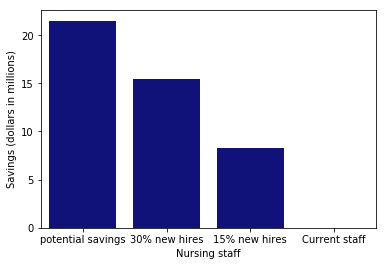

In [85]:
y = [21.5,15.5,8.3,0]
x = ['potential savings','30% new hires','15% new hires','Current staff']

sns.barplot(x,y,color='darkblue')
plt.xlabel('Nursing staff')
plt.ylabel('Savings (dollars in millions)')

## Test data

In [64]:
test_together = X_test

In [65]:
test_together.head()

,prior_ICU_hours,age_years,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU,admission_referral_EMERGENCY ROOM ADMIT,admission_referral_PHYS REFERRAL,admission_referral_TRANSFER FROM HOSP,admission_referral_TRANSFER FROM OTHER HEALT,...,mental,misc,muscular,neoplasms,nervous,perinatal,pregnancy,respiratory,skin,special considerations
7534,657.2,76.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24269,13.3,82.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9625,0.2,85.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36458,41.6,57.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
26430,0.2,86.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [66]:
test_together['CLABSI'] = y_test
test_together.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7637 entries, 7534 to 2179
Data columns (total 37 columns):
prior_ICU_hours                                 7637 non-null float64
age_years                                       7637 non-null float64
first_careunit_CSRU                             7637 non-null float64
first_careunit_MICU                             7637 non-null float64
first_careunit_SICU                             7637 non-null float64
first_careunit_TSICU                            7637 non-null float64
admission_referral_EMERGENCY ROOM ADMIT         7637 non-null float64
admission_referral_PHYS REFERRAL                7637 non-null float64
admission_referral_TRANSFER FROM HOSP           7637 non-null float64
admission_referral_TRANSFER FROM OTHER HEALT    7637 non-null float64
admission_referral_TRANSFER FROM SKILLED NUR    7637 non-null float64
insurance_Medicaid                              7637 non-null float64
insurance_Medicare                              76

In [68]:
patients_w_infection = test_together[test_together['CLABSI'] == 1]['CLABSI'].count()
patients_w_infection

1287